Task 1: Import Libraries

In [1]:
from skimage import color, data, filters, io, measure, metrics, morphology, restoration, util
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

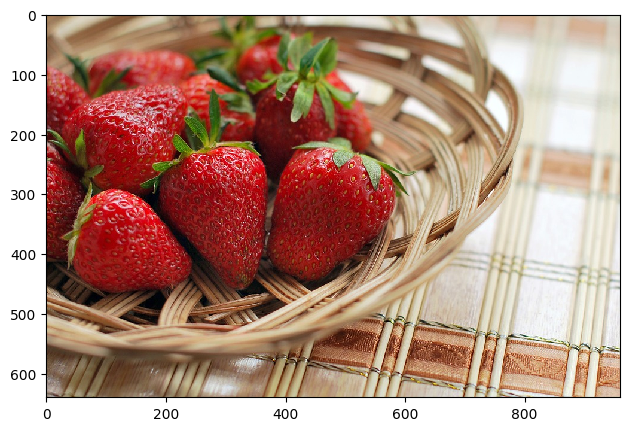

In [6]:
# Import the image
strawberry = util.img_as_float(io.imread("./strawberry.jpeg"))
# Display the image
io.imshow(strawberry)

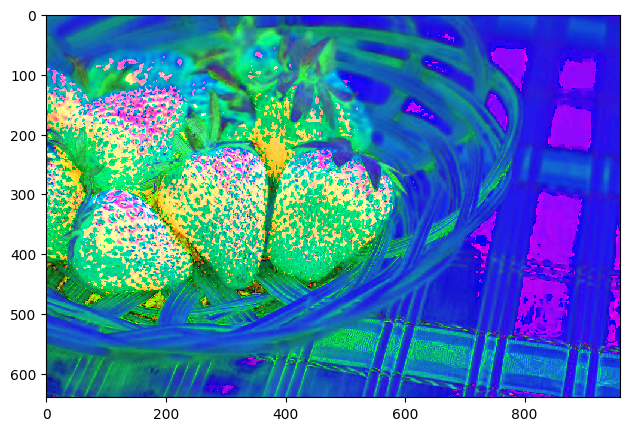

In [7]:
strawberry_hsv = color.rgb2hsv(strawberry)
io.imshow(strawberry_hsv)

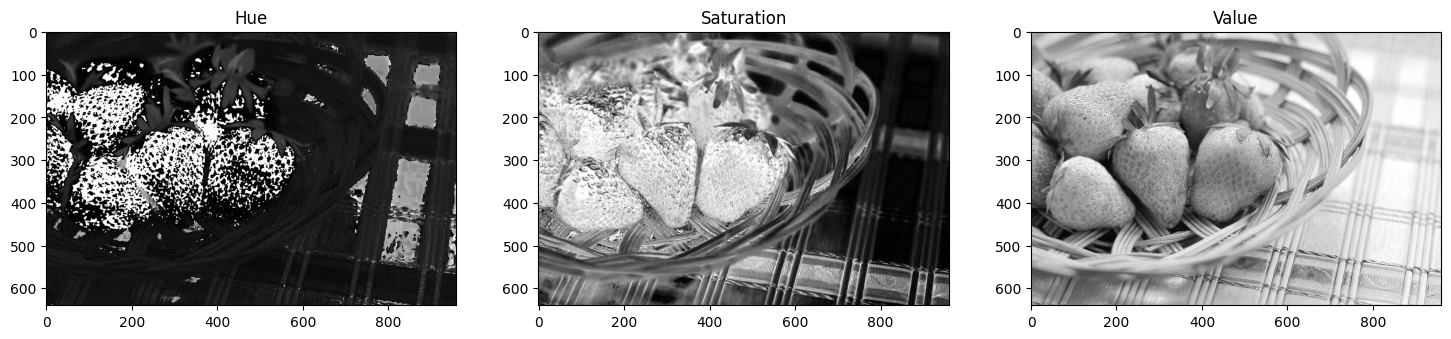

In [8]:
layer_title = ['Hue', 'Saturation', 'Value']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 9))
for i in range(3):
    ax[i].imshow(strawberry_hsv[:, :, i], cmap='gray')
    ax[i].set_title(layer_title[i])

In [ ]:
layer_title = ['Hue', 'Saturation', 'Value']
strawberry_threshold = []
lower = 0.2
higher = 0.3

while lower < higher:
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(1, 1))
  # To plot the transformed image
  for i in range(1):
    # Apply the thresholding filter and plot it
    strawberry_threshold = filters.apply_hysteresis_threshold(strawberry_hsv[:, :, i], lower, higher)
    ax[i].imshow(strawberry_threshold, cmap='gray')
    ax[i].set_title(layer_title[i] + " —    Lower threshold: " + str(round(lower, 1)))
lower = lower + 0.1


<ipython-input-9-5fc156121547>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(1, 1))


In [2]:
strawberry_threshold = filters.apply_hysteresis_threshold(strawberry_hsv[:, :, 1], 0.6, higher)

for i in range(3):
  strawberry_hsv[:, :, i] = strawberry_hsv[:, :, i] * strawberry_threshold

NameError: name 'filters' is not defined

In [3]:
io.imshow(strawberry_hsv)

NameError: name 'io' is not defined

In [ ]:
lower = 0.2

 while lower < higher:
     fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(1, 1))
     # To plot the transformed image
     for i in range(3):
         # Apply the thresholding filter and plot it
         strawberry_threshold = filters.apply_hysteresis_threshold(strawberry_hsv[:, :, i], lower, higher)
         ax[i].imshow(strawberry_threshold, cmap='gray')
         ax[i].set_title(layer_title[i] + " — Lower threshold: " + str(round(lower, 1)))
     lower = lower + 0.1

In [ ]:
 lower = 0.2

 while lower < higher:
     fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(1, 1))
     # To plot the transformed image
     for i in range(3):
         # Apply the thresholding filter and plot it
         strawberry_threshold = filters.apply_hysteresis_threshold(strawberry_hsv[:, :, i], lower, higher)
         ax[i].imshow(strawberry_threshold, cmap='gray')
         ax[i].set_title(layer_title[i] + " — Lower threshold: " + str(round(lower, 1)))
     lower = lower + 0.1

In [ ]:
strawberry_threshold = filters.apply_hysteresis_threshold(strawberry_hsv[:, :, 2], 0.3, higher)

for i in range(3):
    strawberry_hsv[:, :, i] = strawberry_hsv[:, :, i] * strawberry_threshold

    plt.imshow(strawberry_hsv)

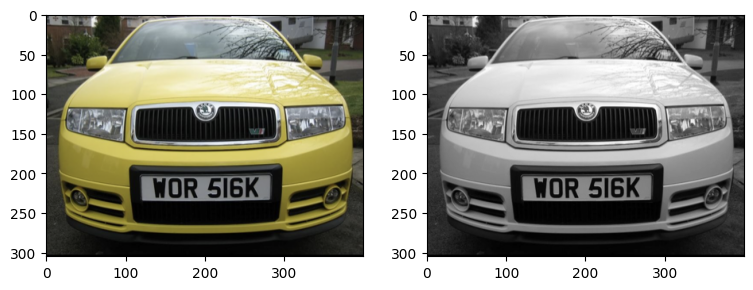

In [2]:
# Import the image
img_plate = io.imread("./car_plate.png")
plate = img_plate.copy()
plate = color.rgba2rgb(plate)

# Transform to grayscale
plate = color.rgb2gray(plate)

# Plot the image
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,9))
ax[0].imshow(img_plate)
ax[1].imshow(plate, cmap='gray')

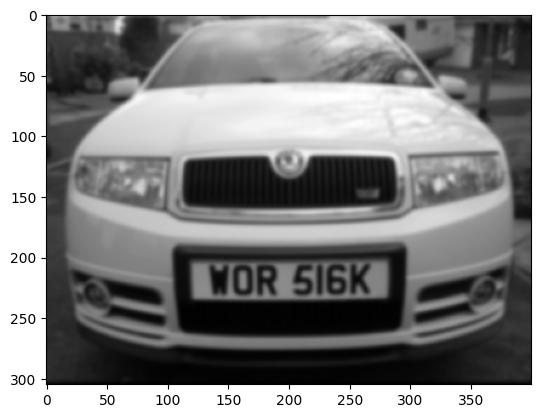

In [3]:
gaussian_plate = filters.gaussian(plate, sigma=1.5)
plt.imshow(gaussian_plate, cmap='gray')

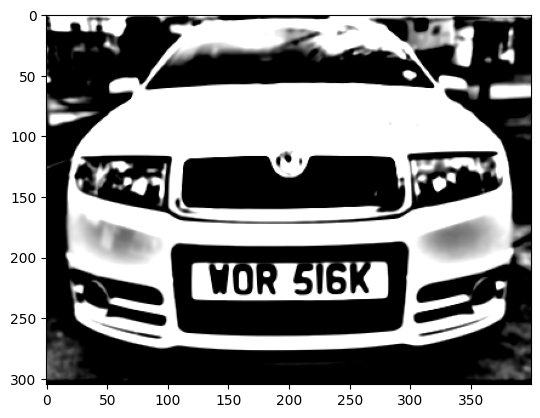

In [4]:
unsharp_plate = filters.unsharp_mask(gaussian_plate, radius=20, amount=8)
plt.imshow(unsharp_plate, cmap='gray')

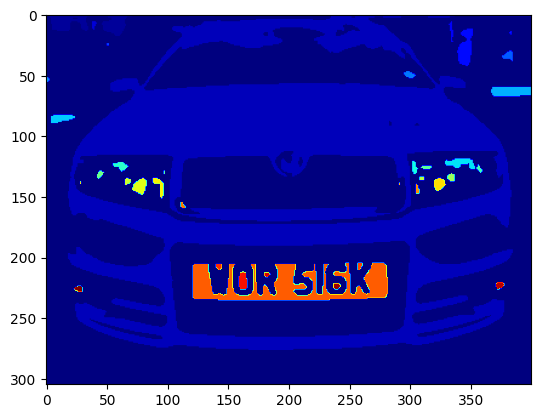

In [5]:
label_plate= measure.label(unsharp_plate)
plt.imshow(label_plate, cmap='jet')

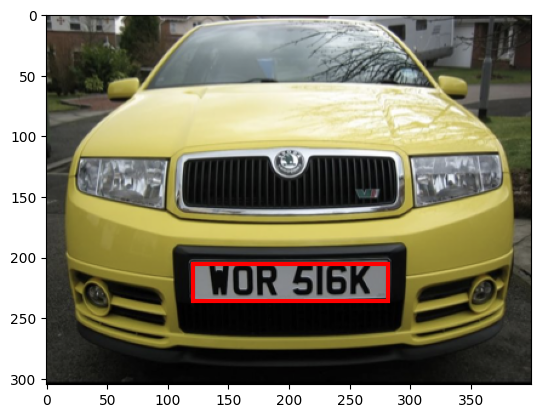

In [6]:
# Plot the car image
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(img_plate)

for region in measure.regionprops(label_plate):
    # Identify the region
    if region.area >= 500 and region.area/region.area_bbox >=0.4:
      # Draw rectangle around labeled segments
      min_row, min_col, max_row, max_col = region.bbox
      rect = mpatches.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row,
                             fill=False, edgecolor='red', linewidth=3)
      ax.add_patch(rect)